# Initial EDA on Feature Subset


#### Street: Type of road access to property
       Grvl   Gravel 
       Pave   Paved
              
#### Alley: Type of alley access to property
       Grvl   Gravel
       Pave   Paved
       NA     No alley access

#### Condition1: Proximity to various conditions       
       Artery Adjacent to arterial street
       Feedr  Adjacent to feeder street   
       Norm   Normal 
       RRNn   Within 200' of North-South Railroad
       RRAn   Adjacent to North-South Railroad
       PosN   Near positive off-site feature--park, greenbelt, etc.
       PosA   Adjacent to postive off-site feature
       RRNe   Within 200' of East-West Railroad
       RRAe   Adjacent to East-West Railroad
       
#### Condition2: Proximity to various conditions (if more than one is present)              
       Artery Adjacent to arterial street
       Feedr  Adjacent to feeder street   
       Norm   Normal 
       RRNn   Within 200' of North-South Railroad
       RRAn   Adjacent to North-South Railroad
       PosN   Near positive off-site feature--park, greenbelt, etc.
       PosA   Adjacent to postive off-site feature
       RRNe   Within 200' of East-West Railroad
       RRAe   Adjacent to East-West Railroad

#### RoofStyle: Type of roof
       Flat   Flat
       Gable  Gable
       Gambrel       Gabrel (Barn)
       Hip    Hip
       Mansard       Mansard
       Shed   Shed
              
#### RoofMatl: Roof material
       ClyTile       Clay or Tile
       CompShg       Standard (Composite) Shingle
       Membran       Membrane
       Metal  Metal
       Roll   Roll
       Tar&Grv       Gravel & Tar
       WdShake       Wood Shakes
       WdShngl       Wood Shingles
              
#### Exterior1st: Exterior covering on house
       AsbShng       Asbestos Shingles
       AsphShn       Asphalt Shingles
       BrkComm       Brick Common
       BrkFace       Brick Face
       CBlock Cinder Block
       CemntBd       Cement Board
       HdBoard       Hard Board
       ImStucc       Imitation Stucco
       MetalSd       Metal Siding
       Other  Other
       Plywood       Plywood
       PreCast       PreCast       
       Stone  Stone
       Stucco Stucco
       VinylSd       Vinyl Siding
       Wd Sdng       Wood Siding
       WdShing       Wood Shingles
       
#### Exterior2nd: Exterior covering on house (if more than one material)
       AsbShng       Asbestos Shingles
       AsphShn       Asphalt Shingles
       BrkComm       Brick Common
       BrkFace       Brick Face
       CBlock Cinder Block
       CemntBd       Cement Board
       HdBoard       Hard Board
       ImStucc       Imitation Stucco
       MetalSd       Metal Siding
       Other  Other
       Plywood       Plywood
       PreCast       PreCast
       Stone  Stone
       Stucco Stucco
       VinylSd       Vinyl Siding
       Wd Sdng       Wood Siding
       WdShing       Wood Shingles
       
#### MasVnrType: Masonry veneer type
       BrkCmn Brick Common
       BrkFace       Brick Face
       CBlock Cinder Block
       None   None
       Stone  Stone
       
#### MasVnrArea: Masonry veneer area in square feet

#### ExterQual: Evaluates the quality of the material on the exterior              
       Ex     Excellent
       Gd     Good
       TA     Average/Typical
       Fa     Fair
       Po     Poor
              
#### ExterCond: Evaluates the present condition of the material on the exterior              
       Ex     Excellent
       Gd     Good
       TA     Average/Typical
       Fa     Fair
       Po     Poor

#### Fence: Fence quality              
       GdPrv  Good Privacy
       MnPrv  Minimum Privacy
       GdWo   Good Wood
       MnWw   Minimum Wood/Wire
       NA     No Fence

#### GarageType: Garage location              
       2Types More than one type of garage
       Attchd Attached to home
       Basment       Basement Garage
       BuiltIn       Built-In (Garage part of house - typically has room above garage)
       CarPort       Car Port
       Detchd Detached from home
       NA     No Garage
              
#### GarageYrBlt: Year garage was built
              
#### GarageFinish: Interior finish of the garage
       Fin    Finished
       RFn    Rough Finished       
       Unf    Unfinished
       NA     No Garage
              
#### GarageCars: Size of garage in car capacity

#### GarageArea: Size of garage in square feet

#### GarageQual: Garage quality
       Ex     Excellent
       Gd     Good
       TA     Typical/Average
       Fa     Fair
       Po     Poor
       NA     No Garage
              
#### GarageCond: Garage condition
       Ex     Excellent
       Gd     Good
       TA     Typical/Average
       Fa     Fair
       Po     Poor
       NA     No Garage
              
#### PavedDrive: Paved driveway
       Y      Paved 
       P      Partial Pavement
       N      Dirt/Gravel

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline 
import seaborn as sns

In [2]:
trainSet = pd.read_csv('trainset.csv')

In [89]:
#### Look at data for the whole dataset
# trainSet.head()
# trainSet.describe()
# trainSet.columns

In [16]:
# Separate features assigned to me for EDA
# - GarageType

jhFeatures = ['Street', 'Alley', 'Condition1', 'Condition2',
              'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Fence', 
              'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
             'SalePrice']
trainSetJ = trainSet[jhFeatures]

In [18]:
# Describe Quantitative variables
trainSetJ.describe()

,MasVnrArea,GarageYrBlt,GarageCars,GarageArea,SalePrice
count,1924.000000,1837.000000,1934.000000,1934.000000,1935.000000
mean,97.270790,1976.942842,1.752327,468.863495,178494.854780
std,170.906655,24.676855,0.750363,212.012862,75786.077025
min,0.000000,1900.000000,0.000000,0.000000,12789.000000
25%,0.000000,1960.000000,1.000000,312.000000,129900.000000
50%,0.000000,1978.000000,2.000000,476.000000,160000.000000
75%,160.000000,2000.000000,2.000000,576.000000,210950.000000
max,1290.000000,2010.000000,5.000000,1488.000000,755000.000000


In [26]:
trainSetJ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1935 entries, 0 to 1934
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Street        1935 non-null   object 
 1   Alley         132 non-null    object 
 2   Condition1    1935 non-null   object 
 3   Condition2    1935 non-null   object 
 4   RoofStyle     1935 non-null   object 
 5   RoofMatl      1935 non-null   object 
 6   Exterior1st   1935 non-null   object 
 7   Exterior2nd   1935 non-null   object 
 8   MasVnrType    1924 non-null   object 
 9   MasVnrArea    1924 non-null   float64
 10  ExterQual     1935 non-null   object 
 11  ExterCond     1935 non-null   object 
 12  Fence         386 non-null    object 
 13  GarageType    1839 non-null   object 
 14  GarageYrBlt   1837 non-null   float64
 15  GarageFinish  1837 non-null   object 
 16  GarageCars    1934 non-null   float64
 17  GarageArea    1934 non-null   float64
 18  GarageQual    1837 non-null 

array([[<AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'GarageYrBlt'}>],
       [<AxesSubplot:title={'center':'GarageCars'}>,
        <AxesSubplot:title={'center':'GarageArea'}>],
       [<AxesSubplot:title={'center':'SalePrice'}>, <AxesSubplot:>]],
      dtype=object)

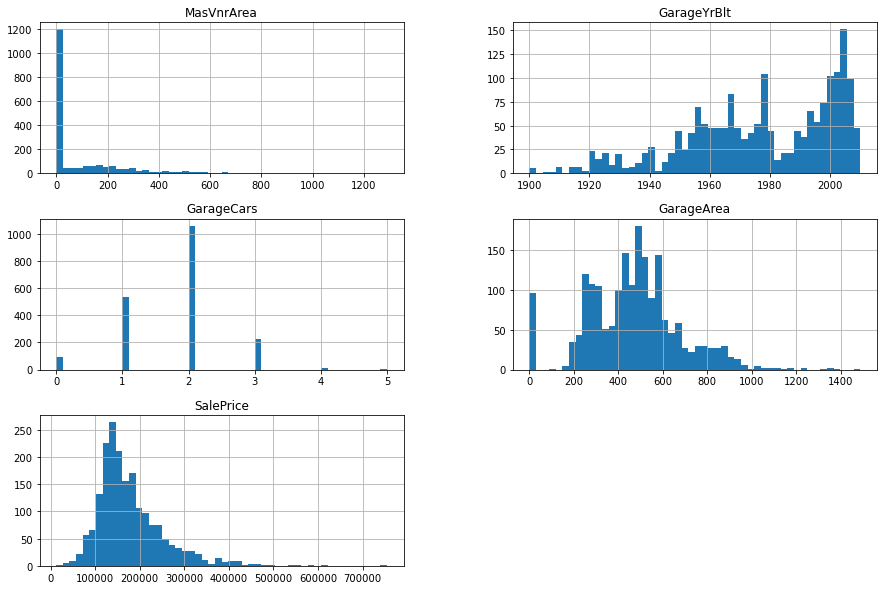

In [24]:
trainSetJ.hist(bins=50, figsize=(15,10))

In [25]:
# Check null values
trainSetJ.isnull().sum(axis=0)

Street             0
Alley           1803
Condition1         0
Condition2         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType        11
MasVnrArea        11
ExterQual          0
ExterCond          0
Fence           1549
GarageType        96
GarageYrBlt       98
GarageFinish      98
GarageCars         1
GarageArea         1
GarageQual        98
GarageCond        98
PavedDrive         0
SalePrice          0
dtype: int64

In [51]:
# Split Numeric and non-numeric features
trainSetNumeric = trainSetJ.loc[:, trainSetJ.dtypes != 'object']
trainSetNonNumeric = trainSetJ.loc[:, trainSetJ.dtypes == 'object']
trainSetNumeric.describe()

,MasVnrArea,GarageYrBlt,GarageCars,GarageArea,SalePrice
count,1924.000000,1837.000000,1934.000000,1934.000000,1935.000000
mean,97.270790,1976.942842,1.752327,468.863495,178494.854780
std,170.906655,24.676855,0.750363,212.012862,75786.077025
min,0.000000,1900.000000,0.000000,0.000000,12789.000000
25%,0.000000,1960.000000,1.000000,312.000000,129900.000000
50%,0.000000,1978.000000,2.000000,476.000000,160000.000000
75%,160.000000,2000.000000,2.000000,576.000000,210950.000000
max,1290.000000,2010.000000,5.000000,1488.000000,755000.000000


In [52]:
trainSetNonNumeric.describe()

,Street,Alley,Condition1,Condition2,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Fence,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive
count,1935,132,1935,1935,1935,1935,1935,1935,1924,1935,1935,386,1839,1837,1837,1837,1935
unique,2,2,9,8,6,7,15,16,4,4,5,4,6,3,5,5,3
top,Pave,Grvl,Norm,Norm,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,MnPrv,Attchd,Unf,TA,TA,Y
freq,1928,84,1678,1914,1541,1907,644,638,1178,1218,1666,213,1139,832,1736,1763,1751


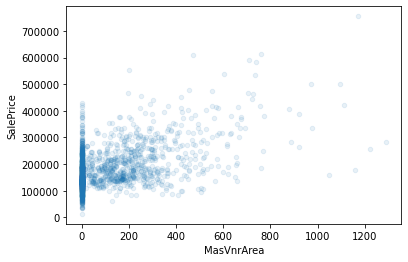

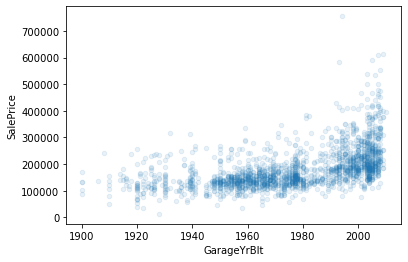

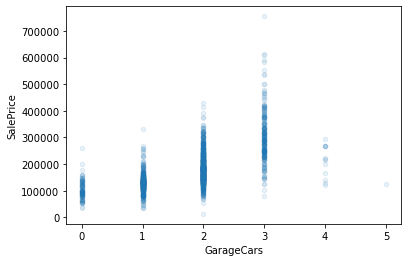

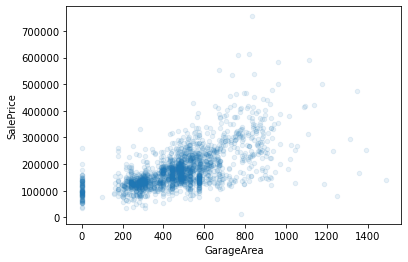

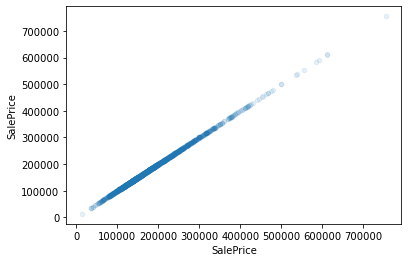

In [53]:
for feat in trainSetNumeric:
    trainSetNumeric.plot.scatter(x=feat, y = 'SalePrice', alpha=0.1)

In [55]:
# Correlation matrix - looking at SalePrie
corr_matrix = trainSetJ.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice      1.000000
GarageCars     0.633432
GarageArea     0.631791
MasVnrArea     0.523028
GarageYrBlt    0.518140
Name: SalePrice, dtype: float64

array([[<AxesSubplot:xlabel='MasVnrArea', ylabel='MasVnrArea'>,
        <AxesSubplot:xlabel='GarageYrBlt', ylabel='MasVnrArea'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='MasVnrArea'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='MasVnrArea'>,
        <AxesSubplot:xlabel='SalePrice', ylabel='MasVnrArea'>],
       [<AxesSubplot:xlabel='MasVnrArea', ylabel='GarageYrBlt'>,
        <AxesSubplot:xlabel='GarageYrBlt', ylabel='GarageYrBlt'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='GarageYrBlt'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='GarageYrBlt'>,
        <AxesSubplot:xlabel='SalePrice', ylabel='GarageYrBlt'>],
       [<AxesSubplot:xlabel='MasVnrArea', ylabel='GarageCars'>,
        <AxesSubplot:xlabel='GarageYrBlt', ylabel='GarageCars'>,
        <AxesSubplot:xlabel='GarageCars', ylabel='GarageCars'>,
        <AxesSubplot:xlabel='GarageArea', ylabel='GarageCars'>,
        <AxesSubplot:xlabel='SalePrice', ylabel='GarageCars'>],
       [<AxesSubplot:xlabel='Mas

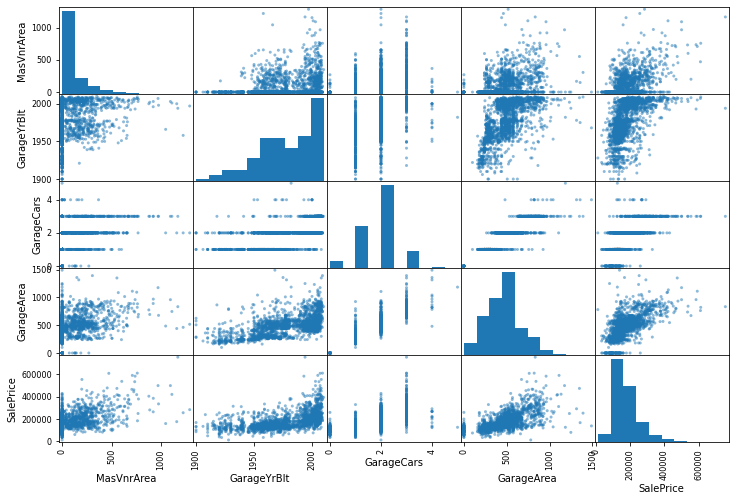

In [57]:
from pandas.plotting import scatter_matrix
scatter_matrix(trainSetNumeric, figsize = (12,8))

## Seaborn plots of each


### Alley: Type of alley access to property
       Grvl   Gravel
       Pave   Paved
       NA     No alley access
       
1803 null

In [66]:
# Do I need this:
# sns.set()

In [88]:
# trainSetJ.columns

<AxesSubplot:xlabel='Alley', ylabel='SalePrice'>

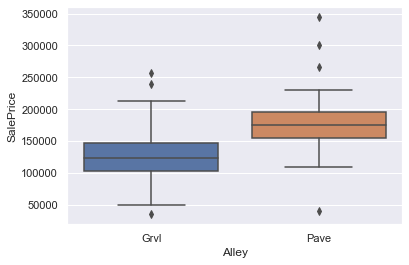

In [68]:
sns.boxplot(data=trainSetJ, x="Alley", y="SalePrice")

### Street: Type of road access to property

       Grvl   Gravel 
       Pave   Paved
       

<AxesSubplot:xlabel='Street', ylabel='SalePrice'>

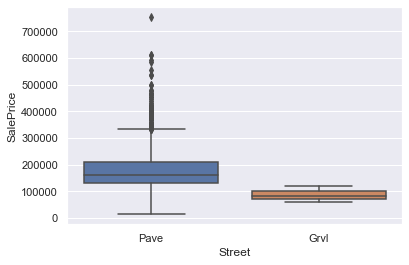

In [69]:
sns.boxplot(data=trainSetJ, x="Street", y="SalePrice")

### Condition1: Proximity to various conditions
       
       Artery Adjacent to arterial street
       Feedr  Adjacent to feeder street   
       Norm   Normal 
       RRNn   Within 200' of North-South Railroad
       RRAn   Adjacent to North-South Railroad
       PosN   Near positive off-site feature--park, greenbelt, etc.
       PosA   Adjacent to postive off-site feature
       RRNe   Within 200' of East-West Railroad
       RRAe   Adjacent to East-West Railroad

<AxesSubplot:xlabel='Condition1', ylabel='SalePrice'>

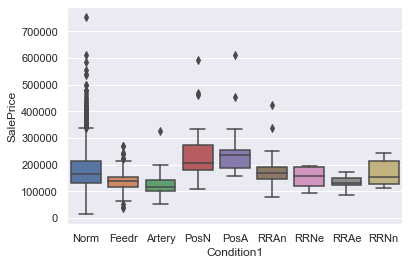

In [70]:
sns.boxplot(data=trainSetJ, x="Condition1", y="SalePrice")

### Condition2: Proximity to various conditions (if more than one is present)
              
       Artery Adjacent to arterial street
       Feedr  Adjacent to feeder street   
       Norm   Normal 
       RRNn   Within 200' of North-South Railroad
       RRAn   Adjacent to North-South Railroad
       PosN   Near positive off-site feature--park, greenbelt, etc.
       PosA   Adjacent to postive off-site feature
       RRNe   Within 200' of East-West Railroad
       RRAe   Adjacent to East-West Railroad

<AxesSubplot:xlabel='Condition2', ylabel='SalePrice'>

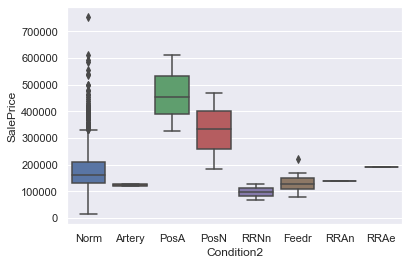

In [71]:
sns.boxplot(data=trainSetJ, x="Condition2", y="SalePrice")
sns.hist

### RoofStyle: Type of roof

       Flat   Flat
       Gable  Gable
       Gambrel       Gabrel (Barn)
       Hip    Hip
       Mansard       Mansard
       Shed   Shed

<AxesSubplot:xlabel='RoofStyle', ylabel='SalePrice'>

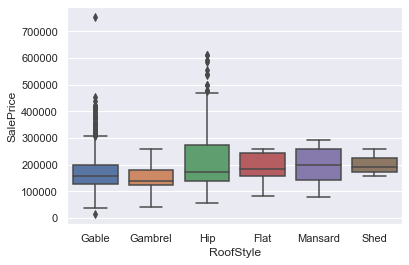

In [72]:
sns.boxplot(data=trainSetJ, x="RoofStyle", y="SalePrice")

### RoofMatl: Roof material

       ClyTile       Clay or Tile
       CompShg       Standard (Composite) Shingle
       Membran       Membrane
       Metal  Metal
       Roll   Roll
       Tar&Grv       Gravel & Tar
       WdShake       Wood Shakes
       WdShngl       Wood Shingles

<AxesSubplot:xlabel='RoofMatl', ylabel='SalePrice'>

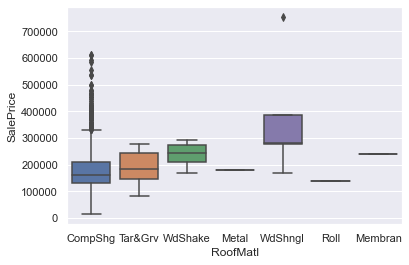

In [73]:
sns.boxplot(data=trainSetJ, x="RoofMatl", y="SalePrice")

### Exterior1st: Exterior covering on house

       AsbShng       Asbestos Shingles
       AsphShn       Asphalt Shingles
       BrkComm       Brick Common
       BrkFace       Brick Face
       CBlock Cinder Block
       CemntBd       Cement Board
       HdBoard       Hard Board
       ImStucc       Imitation Stucco
       MetalSd       Metal Siding
       Other  Other
       Plywood       Plywood
       PreCast       PreCast       
       Stone  Stone
       Stucco Stucco
       VinylSd       Vinyl Siding
       Wd Sdng       Wood Siding
       WdShing       Wood Shingles

<AxesSubplot:xlabel='Exterior1st', ylabel='SalePrice'>

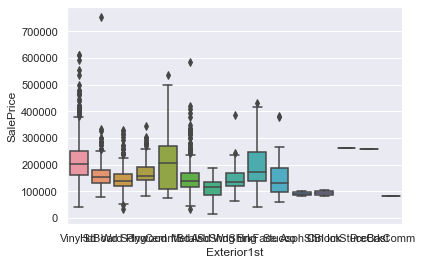

In [74]:
sns.boxplot(data=trainSetJ, x="Exterior1st", y="SalePrice")

### Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng       Asbestos Shingles
       AsphShn       Asphalt Shingles
       BrkComm       Brick Common
       BrkFace       Brick Face
       CBlock Cinder Block
       CemntBd       Cement Board
       HdBoard       Hard Board
       ImStucc       Imitation Stucco
       MetalSd       Metal Siding
       Other  Other
       Plywood       Plywood
       PreCast       PreCast
       Stone  Stone
       Stucco Stucco
       VinylSd       Vinyl Siding
       Wd Sdng       Wood Siding
       WdShing       Wood Shingles

<AxesSubplot:xlabel='Exterior2nd', ylabel='SalePrice'>

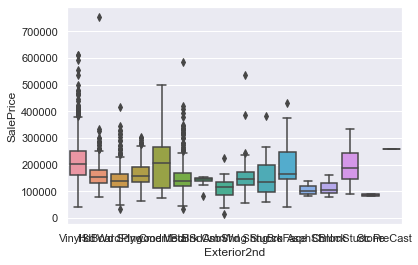

In [75]:
sns.boxplot(data=trainSetJ, x="Exterior2nd", y="SalePrice")

### MasVnrType: Masonry veneer type

       BrkCmn Brick Common
       BrkFace       Brick Face
       CBlock Cinder Block
       None   None
       Stone  Stone

<AxesSubplot:xlabel='MasVnrType', ylabel='SalePrice'>

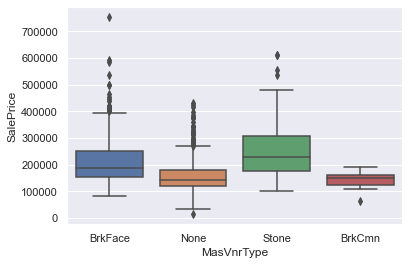

In [76]:
sns.boxplot(data=trainSetJ, x="MasVnrType", y="SalePrice")

 ### ExterQual: Evaluates the quality of the material on the exterior 
              
       Ex     Excellent
       Gd     Good
       TA     Average/Typical
       Fa     Fair
       Po     Poor

<AxesSubplot:xlabel='ExterQual', ylabel='SalePrice'>

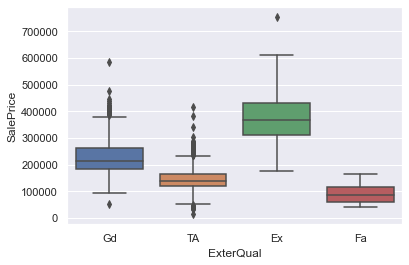

In [77]:
sns.boxplot(data=trainSetJ, x="ExterQual", y="SalePrice")

### ExterCond: Evaluates the present condition of the material on the exterior
              
       Ex     Excellent
       Gd     Good
       TA     Average/Typical
       Fa     Fair
       Po     Poor

<AxesSubplot:xlabel='ExterCond', ylabel='SalePrice'>

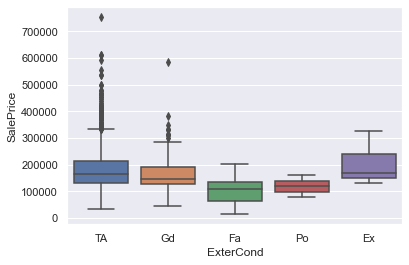

In [78]:
sns.boxplot(data=trainSetJ, x="ExterCond", y="SalePrice")

### Fence: Fence quality
              
       GdPrv  Good Privacy
       MnPrv  Minimum Privacy
       GdWo   Good Wood
       MnWw   Minimum Wood/Wire
       NA     No Fence

<AxesSubplot:xlabel='Fence', ylabel='SalePrice'>

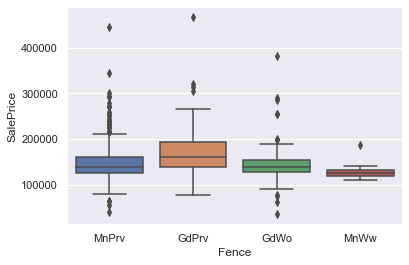

In [79]:
sns.boxplot(data=trainSetJ, x="Fence", y="SalePrice")

### GarageType: Garage location
              
       2Types More than one type of garage
       Attchd Attached to home
       Basment       Basement Garage
       BuiltIn       Built-In (Garage part of house - typically has room above garage)
       CarPort       Car Port
       Detchd Detached from home
       NA     No Garage

<AxesSubplot:xlabel='GarageType', ylabel='SalePrice'>

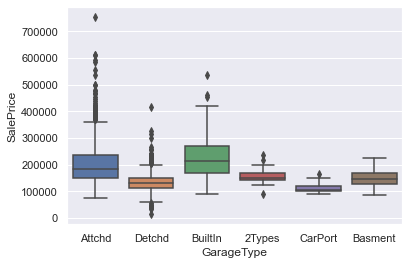

In [80]:
sns.boxplot(data=trainSetJ, x="GarageType", y="SalePrice")

### GarageYrBlt: Year garage was built

<AxesSubplot:xlabel='GarageYrBlt', ylabel='SalePrice'>

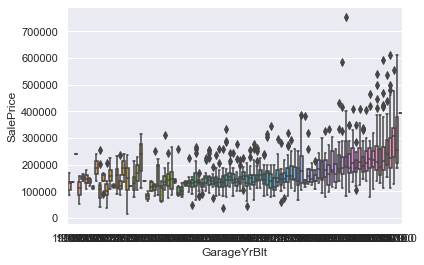

In [81]:
sns.boxplot(data=trainSetJ, x="GarageYrBlt", y="SalePrice")

### GarageFinish: Interior finish of the garage

       Fin    Finished
       RFn    Rough Finished       
       Unf    Unfinished

<AxesSubplot:xlabel='GarageFinish', ylabel='SalePrice'>

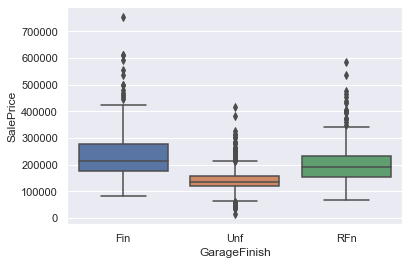

In [82]:
sns.boxplot(data=trainSetJ, x="GarageFinish", y="SalePrice")

### GarageCars: Size of garage in car capacity

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

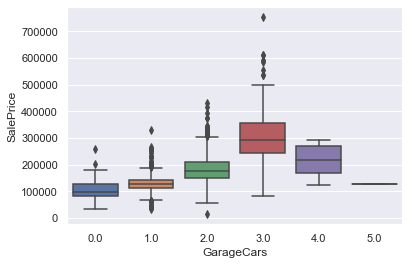

In [83]:
sns.boxplot(data=trainSetJ, x="GarageCars", y="SalePrice")

### GarageArea: Size of garage in square feet

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

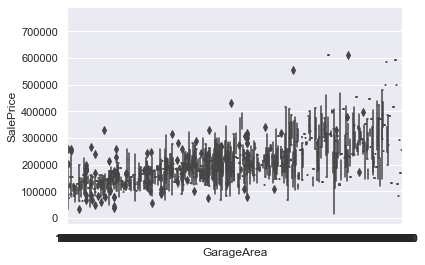

In [84]:
sns.boxplot(data=trainSetJ, x="GarageArea", y="SalePrice")

### GarageQual: Garage quality

       Ex     Excellent
       Gd     Good
       TA     Typical/Average
       Fa     Fair
       Po     Poor
       NA     No Garage

<AxesSubplot:xlabel='GarageQual', ylabel='SalePrice'>

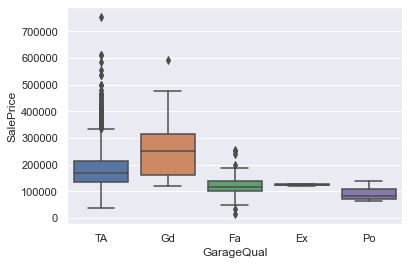

In [85]:
sns.boxplot(data=trainSetJ, x="GarageQual", y="SalePrice")

### GarageCond: Garage condition

       Ex     Excellent
       Gd     Good
       TA     Typical/Average
       Fa     Fair
       Po     Poor
       NA     No Garage

<AxesSubplot:xlabel='GarageCond', ylabel='SalePrice'>

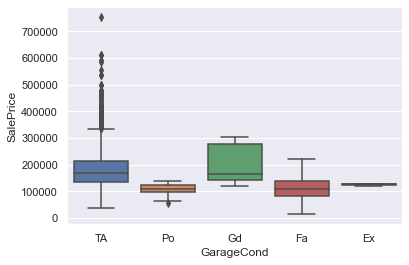

In [86]:
sns.boxplot(data=trainSetJ, x="GarageCond", y="SalePrice")

### PavedDrive: Paved driveway

       Y      Paved 
       P      Partial Pavement
       N      Dirt/Gravel

<AxesSubplot:xlabel='PavedDrive', ylabel='SalePrice'>

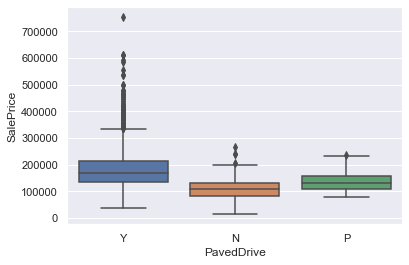

In [87]:
sns.boxplot(data=trainSetJ, x="PavedDrive", y="SalePrice")